In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [ ]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [ ]:
# reading the excel file into pandas dataframe
creditcard_data = pd.read_excel("Credit Card Customer Data.xlsx") 

In [ ]:
creditcard_data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
##Remove Sl No and Customer Key since it is redundant
creditcard_data.drop({'Sl_No','Customer Key'}, axis=1, inplace=True)

In [ ]:
creditcard_data.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


# Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. 

In [ ]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


* Data above shows that their are no null or missing values for any columns.

In [ ]:
creditcard_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


###Univariate Analysis

###Printing Total number of Outliers for each attribute

In [ ]:
Q1 = creditcard_data.quantile(0.25)
Q3 = creditcard_data.quantile(0.75)
IQR = Q3 - Q1

((creditcard_data < (Q1 - 1.5 * IQR)) | (creditcard_data > (Q3 + 1.5 * IQR))).sum()

Avg_Credit_Limit       39
Total_Credit_Cards      0
Total_visits_bank       0
Total_visits_online    37
Total_calls_made        0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


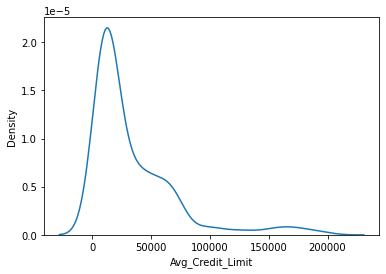

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


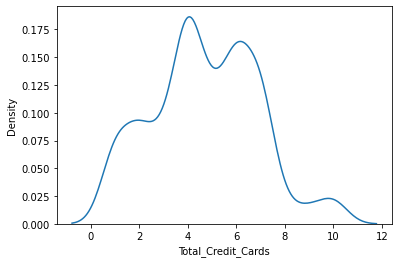

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


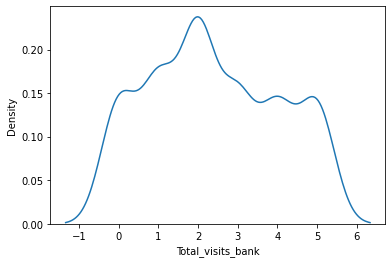

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


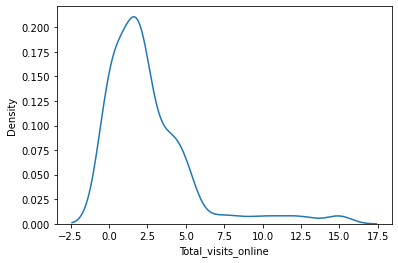

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


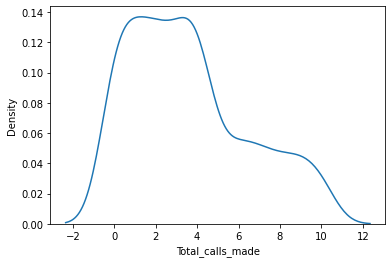

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


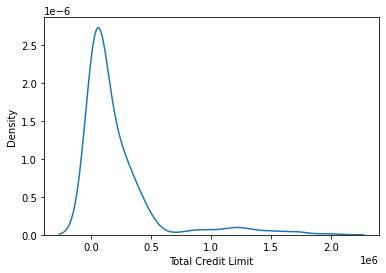

In [ ]:
import seaborn as sns

for i in creditcard_data.columns:
    sns.distplot(creditcard_data[i],hist=False,)
    plt.show()

* **Insights from Univariate Analysis**

1. There are no null values in any of the columns.
2. Except for **S.No** and **CustomerKey** columns, rest all columns can be included for Unsupervised learning as they are all continuous values and not categorical variables.
3. Only **Avg_Credit_Limit** and **Total_visits_online** have Outlier values hence all these values may form a cluster of their own. It will interesting to see.
4. Customers communicated with the Bank using 3 channels ways:         

    *   By Visiting the Bank in Person
    *   By Online means
    *   By making calls
Hence it will be interesting to see if the channel becomes the reason for forming a cluster of customers.

5. **Avg_Credit_Limit** and **Total_Credit_Cards** can be multiplied and converted to one single column **Total_Credit_Limit**. This feature is going to have a higher importance in identify the cutomers who have current lower limit and can be targetted to upsell either by increasing their credit limit or by selling them more credit cards.
         
         


    

In [ ]:
# Adding column Total_Credit_Limit

creditcard_data['Total Credit Limit'] = creditcard_data['Avg_Credit_Limit'] * creditcard_data['Total_Credit_Cards']

creditcard_data_transformed = creditcard_data.iloc[:,2:6]

print(creditcard_data_transformed)


     Total_visits_bank  ...  Total Credit Limit
0                    1  ...              200000
1                    0  ...              150000
2                    1  ...              350000
3                    1  ...              150000
4                    0  ...              600000
..                 ...  ...                 ...
655                  1  ...              990000
656                  1  ...              840000
657                  1  ...             1160000
658                  1  ...             1720000
659                  0  ...             1503000

[660 rows x 4 columns]


In [ ]:
##Scale the data
from scipy.stats import zscore

creditcard_data_z = creditcard_data_transformed.apply(zscore)


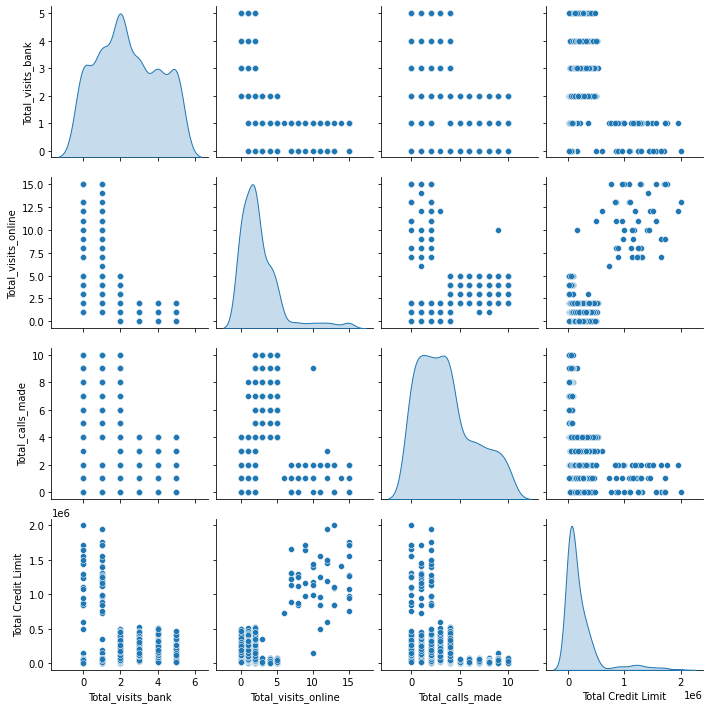

In [ ]:
import seaborn as sns
sns.pairplot(creditcard_data_transformed, diag_kind='kde') 

### Insights from EDA

* The **pairplot** suggests that the guassian distribution of most of the variables have two - three peaks. Hence the data may have 2-3 clusters.
* There are 39 outliers for the independant variable Average Credit Limit. Hence there is possibility that these group of Customers form a cluster of their own.
* The **Pairplot** suggests that usually the Customers with higher **Total Credit Limit** have reached out to the bank through online channel more frequently. Also their are 37 Outliers for **Total Visits online**. This tells us that possibly that the Customers which has Outlier values for these **Total Credit Limit** and **Total Visits online** form a Cluster of their own,

#3.Execute K-means clustering use elbow plot and analyse clusters using boxplot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

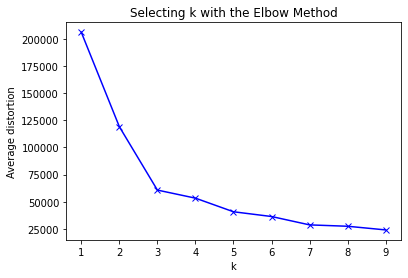

In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(creditcard_data_transformed)
    prediction=model.predict(creditcard_data_transformed)
    meanDistortions.append(sum(np.min(cdist(creditcard_data_transformed, model.cluster_centers_, 'euclidean'), axis=1)) / creditcard_data_transformed
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [ ]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 20, random_state=123)

In [ ]:
kmeans.fit(creditcard_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 0.65934901, -0.55187131, -0.55031131, -0.08598428],
       [-1.10576269,  2.82731942, -0.87432983,  3.08550033],
       [-0.91040105,  0.33172837,  1.16645969, -0.54672909]])

In [ ]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(creditcard_data_z) )

In [ ]:
print(centroid_df)

   Total_visits_bank  Total_visits_online  Total_calls_made  Total Credit Limit
0           0.659349            -0.551871         -0.550311           -0.085984
1          -1.105763             2.827319         -0.874330            3.085500
2          -0.910401             0.331728          1.166460           -0.546729


In [ ]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ + 1 , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

print(df_labels)

    labels
0        1
1        3
2        3
3        3
4        2
..     ...
655      2
656      2
657      2
658      2
659      2

[660 rows x 1 columns]


In [ ]:
# Joining the label dataframe with the data frame.
creditcard_data_labeled = creditcard_data_transformed.join(df_labels)
creditcard_data_labeled_z = creditcard_data_z.join(df_labels)

print(creditcard_data_labeled)

     Total_visits_bank  Total_visits_online  ...  Total Credit Limit  labels
0                    1                    1  ...              200000       1
1                    0                   10  ...              150000       3
2                    1                    3  ...              350000       3
3                    1                    1  ...              150000       3
4                    0                   12  ...              600000       2
..                 ...                  ...  ...                 ...     ...
655                  1                   10  ...              990000       2
656                  1                   13  ...              840000       2
657                  1                    9  ...             1160000       2
658                  1                   15  ...             1720000       2
659                  0                   12  ...             1503000       2

[660 rows x 5 columns]


In [ ]:
creditcard_data_cluster = creditcard_data_labeled.groupby(['labels'])
creditcard_data_cluster.mean()

,Total_visits_bank,Total_visits_online,Total_calls_made,Total Credit Limit
labels,,,,
1,3.478149,0.987147,2.007712,1.839460e+05
2,0.600000,10.900000,1.080000,1.229600e+06
3,0.918552,3.579186,6.923077,3.203620e+04


In [ ]:
creditcard_data_labeled['labels'].value_counts()  

1    389
3    221
2     50
Name: labels, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8316f09320>,
      dtype=object)

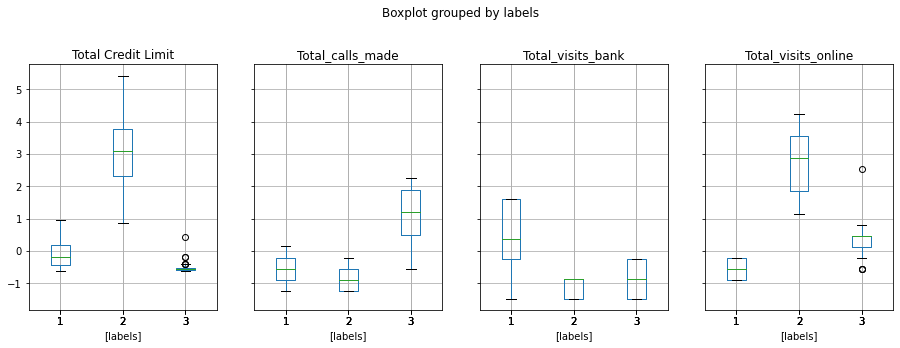

In [ ]:
creditcard_data_labeled_z.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Analysis Of Clusters Identified through K-means

**Note**: From the data the spending pattern is not clear, as having a high credit limit does not necessarily means that the credit limit has been utilized. Hence I am assuming that upselling the customers would mean either selling them new credit card or increasing their card limit.

Based on the above clustering three main segments of Customers have been identified:
*  Group 0 : These Customers have an average credit limit of 33K and have on an average 5-6 credit cards.
*  Group 1 : These Customers have an average credit limit of 12k and have an average 2-3 credit cards.
*  Group 2 : These Customers have an average credit limit of 141K and have a 8-9 credit cards.

**Conclusion** : 

* If the bank wishes to increase their penetration into the csutomer base into a market they should go for Group 2 customers first. There are fairly large number of customers in this group, comprising around 30% of customers with relatively low credit limit. Hence there is a scope of onboarding those customers. 

     Next they can target customers from group 0, has 60% of the total customers. Also members from these groups visit Bank more frequently than the other two groups. Hence that presents the bank as an oppourtunity to sell additional products.

* If the bank wishes to improve service delivery they should start with resolving the query made by Group 2 customers first as these csutomers have made relatively higher number of phone calls for their queries.




# 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

##Find out the linkage matrix

In [ ]:
print(creditcard_data_z)

     Total_visits_bank  ...  Total Credit Limit
0            -0.860451  ...           -0.037292
1            -1.473731  ...           -0.188943
2            -0.860451  ...            0.417660
3            -0.860451  ...           -0.188943
4            -1.473731  ...            1.175914
..                 ...  ...                 ...
655          -0.860451  ...            2.358790
656          -0.860451  ...            1.903838
657          -0.860451  ...            2.874402
658          -0.860451  ...            4.572891
659          -1.473731  ...            3.914727

[660 rows x 4 columns]


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(creditcard_data_z, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [ ]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 240.        ,  344.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       ...,
       [1312.        , 1314.        ,   16.34625689,  383.        ],
       [1315.        , 1316.        ,   42.43243102,  610.        ],
       [1313.        , 1317.        ,   45.93437831,  660.        ]])

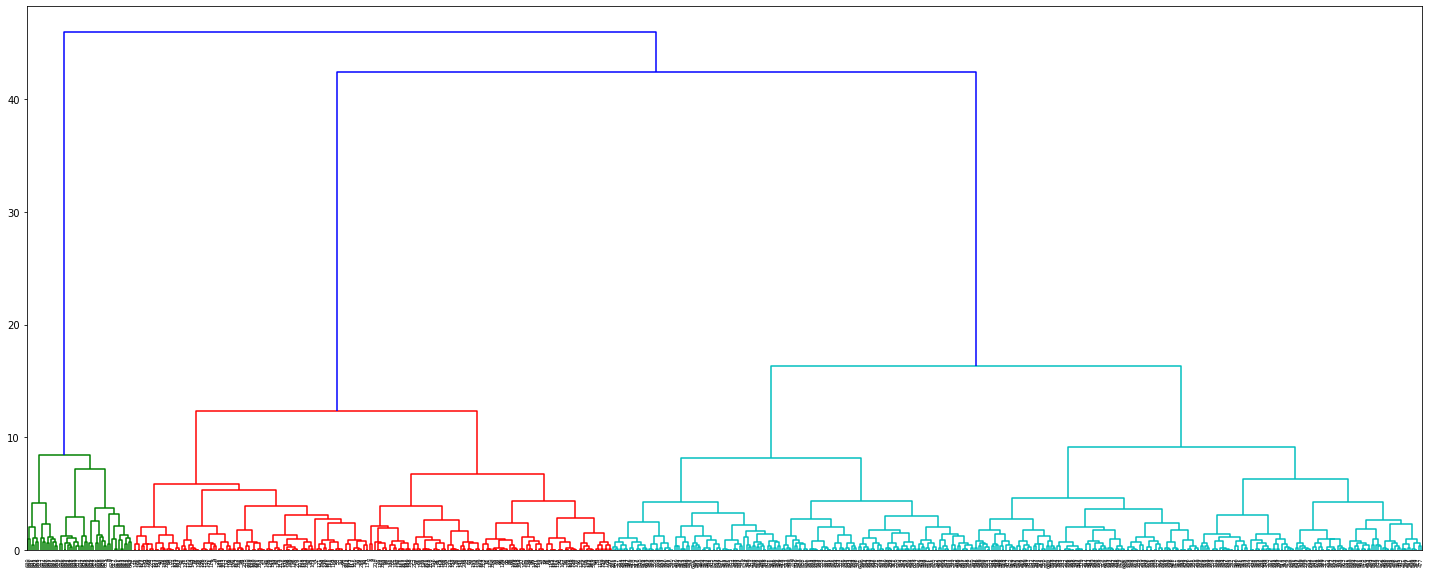

In [ ]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

##From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

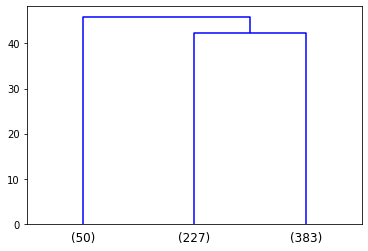

In [ ]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

##Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [ ]:
max_d = 42

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
# Joining Cluster label information with the dataframe

creditcard_data_transformed['label_hr'] = clusters
creditcard_data_labeled_z['label_hr'] = clusters

creditcard_data_hierarchichal_clustering = creditcard_data_transformed.groupby(['label_hr'])
creditcard_data_hierarchichal_clustering.mean()

,Total_visits_bank,Total_visits_online,Total_calls_made,Total Credit Limit
label_hr,,,,
1,0.600000,10.900000,1.080000,1.229600e+06
2,0.942731,3.528634,6.832599,3.072247e+04
3,3.503916,0.976501,1.984334,1.871044e+05


## Determine the box plot for Hierarchichal Cluster

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8313160d30>,
      dtype=object)

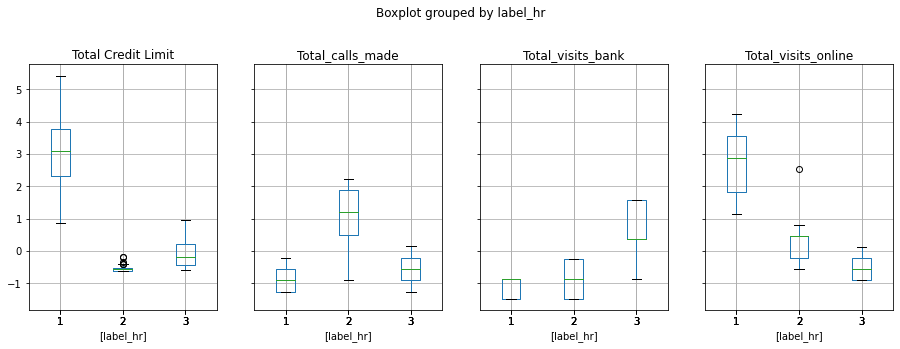

In [ ]:
creditcard_data_labeled_z.boxplot(by='label_hr', layout = (2,4),figsize=(15,10))

# 5.Calculate average silhouette score for both methods. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8312cab748>,
      dtype=object)

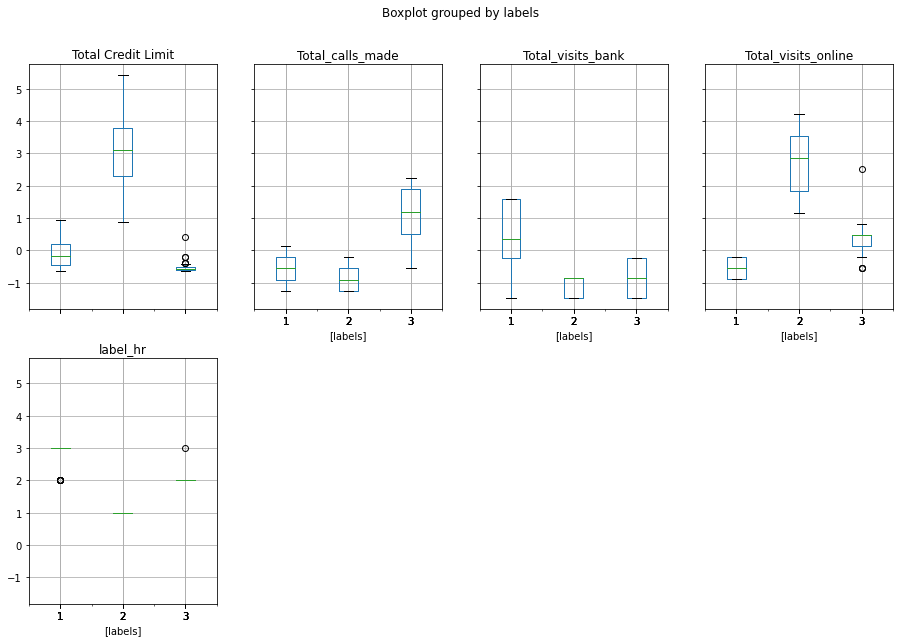

In [ ]:
creditcard_data_labeled_z.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [ ]:
# Avg Silhoutte Score For K-means Clustering

from sklearn.metrics import silhouette_score
silhouette_score(creditcard_data_z,creditcard_data_labeled['labels'])

0.524876239298897

In [ ]:
# Avg Silhoutte Score For Hierarchichal Clustering

from sklearn.metrics import silhouette_score
silhouette_score(creditcard_data_z,clusters)

0.5217313150234595

* **Conclusion** The Average Silhoute Score for both the K-means and Hierarchichal CLustering is similar

#6. Compare K-means clusters with Hierarchical clusters.

In order to compare the clusters identified by both methods, we are going to identify the Average value of the variables for each cluster and compare based on that.

## Average for K-means Clustering

In [ ]:
creditcard_data_cluster = creditcard_data_labeled.groupby(['labels'])
creditcard_data_cluster.mean()

,Total_visits_bank,Total_visits_online,Total_calls_made,Total Credit Limit
labels,,,,
1,3.478149,0.987147,2.007712,1.839460e+05
2,0.600000,10.900000,1.080000,1.229600e+06
3,0.918552,3.579186,6.923077,3.203620e+04


### Average for Hierarchichal Clustering

In [ ]:
creditcard_data_transformed['label_hr'] = clusters

creditcard_data_hierarchichal_clustering = creditcard_data_transformed.groupby(['label_hr'])
creditcard_data_hierarchichal_clustering.mean()

,Total_visits_bank,Total_visits_online,Total_calls_made,Total Credit Limit
label_hr,,,,
1,0.600000,10.900000,1.080000,1.229600e+06
2,0.942731,3.528634,6.832599,3.072247e+04
3,3.503916,0.976501,1.984334,1.871044e+05


* A comparision of the average values in clusters formed by both the methods suggests that the clusters formed in both the cases are almost identical.

They have resembling mean values for all the columns.

# 7.Analysis of the clusters formed, tell us how is one cluster different from another and answer all the key questions.

### Analysis Of Clusters Identified 

**Note**: From the data the spending pattern is not clear, as having a high credit limit does not necessarily means that the credit limit has been utilized. Hence I am assuming that upselling the customers would mean either selling them new credit card or increasing their card limit.

Based on the above clustering three main segments of Customers have been identified:
*  Group 1 : These Customers have an average credit limit of 1.871044e+05 and have on an average 5-6 credit cards.
*  Group 2 : These Customers have an average credit limit of 3.072247e+04 and have an average 2-3 credit cards.
*  Group 3 : These Customers have an average credit limit of 1.229600e+06 and have a 8-9 credit cards.

**Conclusion** : 



* **Key Questions**:
1. How many different segments of customers are there? 
      
    - 3 Clusters have been identified primarily based on the Average Credit Card limit and the preferrrence of communication channel with bank for queries.

    2. How are these segments different from each other?

   These 3 clusters of customers have credit limit in differet ranges. Also their preferrence of channel of communicating with Bank for queries is different.

    * Group 1 :   These customers have visited the bank more number of times compared to members from other groups.

    * Group 2 :   Customer from this group usually calls the bank for credit card related quires.


    * Group 3 : These customers visit online for queries at a higher frequency than the other two groups.

3. What are your recommendations to the bank on how to better market to and service these customers?


  * If the bank wishes to increase their penetration into the csutomer base into a market they should go for Group 2 customers first. There are fairly large number of customers in this group, comprising around 30% of customers with relatively low credit limit. Hence there is a scope of onboarding those customers. 

      Next they can target customers from group 0, has 60% of the total customers. Also members from these groups visit Bank more frequently than the other two groups. Hence that presents the bank as an oppourtunity to sell additional products.

* If the bank wishes to improve service delivery they should focus of improving the query request made through the **Incoming Calls**. They should probabely hire more agents who can resolve the queries of customer. Also by improving on that they may actually upsell to these customers once they are satified have the trust of the customers.

Next channel that they should focus on improving is the online channel(chat/email etc) for resolving customer queries. A lot of load may be taken off my implementing CHATBOTS(**like Bank Of America's Erica**) which may actually help in achieving a higher productivity with lesser workforce.

